In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [2]:
def find_local_min_max(series, x):
    state = {
        'pmin': None,
        'pmin_ind': None,
        'pmax': None,
        'pmax_ind': None,
        'lmin': None,
        'lmax': None
    }
    state['pmin_ind'] = series.index.tolist()[0]
    state['pmin'] = series.iat[0]
    state['pmax_ind'] = series.index.tolist()[0]
    state['pmax'] = series.iat[0]
    local_min_ind = []
    local_min = []
    local_max_ind = []
    local_max = []
    for ind, value in series.iteritems():
        if state['pmin'] is not None and state['pmax'] is not None and state['lmin'] is None and state['lmax'] is None:
            if value <= state['pmin']:
                state['pmin'] = value
                state['pmin_ind'] = ind
                if value <= state['pmax'] * (1 - x):
                    state['lmax'] = state['pmax']
                    local_max_ind.append(state['pmax_ind'])
                    local_max.append(state['pmax'])
                    state['pmax'] = None
                    state['pmax_ind'] = None
            elif value >= state['pmax']:
                state['pmax'] = value
                state['pmax_ind'] = ind
                if value * (1 - x) > state['pmin']:
                    state['lmin'] = state['pmin']
                    local_min_ind.append(state['pmin_ind'])
                    local_min.append(state['pmin'])
                    state['pmin'] = None
                    state['pmin_ind'] = None
            else:
                pass
        elif state['pmax'] is not None and state['lmin'] is not None and state['pmin'] is None and state['lmax'] is None:
            if value >= state['pmax']:
                state['pmax'] = value
                state['pmax_ind'] = ind
            elif value <= state['pmax'] * (1 - x):
                state['lmax'] = state['pmax']
                local_max_ind.append(state['pmax_ind'])
                local_max.append(state['pmax'])
                state['pmax'] = None
                state['pmax_ind'] = None
                state['pmin'] = value
                state['pmin_ind'] = ind
            else:
                pass
        elif state['pmin'] is not None and state['lmax'] is not None and state['pmax'] is None and state['lmin'] is None:
            if value <= state['pmin']:
                state['pmin'] = value
                state['pmin_ind'] = ind
            elif value * (1 - x) >= state['pmin']:
                state['lmin'] = state['pmin']
                local_min_ind.append(state['pmin_ind'])
                local_min.append(state['pmin'])
                state['pmin'] = None
                state['pmin_ind'] = None
                state['pmax'] = value
                state['pmax_ind'] = ind
            else:
                pass
        elif state['lmin'] is not None and state['lmax'] is not None and state['pmax'] is None and state['pmin'] is not None:
            if value <= state['pmin']:
                state['pmin'] = value
                state['pmin_ind'] = ind
            else:
                state['lmin'] = None
                if value * (1 - x) >= state['pmin']:
                    state['lmin'] = state['pmin']
                    local_min_ind.append(state['pmin_ind'])
                    local_min.append(state['pmin'])
                    state['pmin'] = None
                    state['pmin_ind'] = None
                    state['pmax'] = value
                    state['pmax_ind'] = ind
        elif state['lmax'] is not None and state['lmin'] is not None and state['pmin'] is None and state['pmax'] is not None:
            if value >= state['pmax']:
                state['pmax'] = value
                state['pmax_ind'] = ind
            else:
                state['lmax'] = None
                if value <= state['pmax'] * (1 - x):
                    state['lmax'] = state['pmax']
                    local_max_ind.append(state['pmax_ind'])
                    local_max.append(state['pmax'])
                    state['pmax'] = None
                    state['pmax_ind'] = None
                    state['pmin'] = value
                    state['pmin_ind'] = ind
    return local_min_ind, local_min, local_max_ind, local_max

In [4]:
price_path = '/Users/feizhan/Dropbox/Project2M/ASXYearlyCompanyConsolidation/'

In [5]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
dat = pd.DataFrame({})
for year in years:
    dat = dat.append(pd.read_csv(os.path.join(price_path, str(year)+'price.csv')))

In [28]:
code = 'BSM.AX'

In [29]:
code_dat = dat.loc[(dat.code == code).values].copy()

In [30]:
code_dat.head()

,Adj Close,Close,Date,High,Low,Open,Volume,code,is_last_11_day
57548,0.34977,0.34977,2011-01-04,0.35898,0.34517,0.35898,171200.0,BSM.AX,NaN
57549,0.34977,0.34977,2011-01-05,0.35437,0.34517,0.35437,91700.0,BSM.AX,NaN
57550,0.34517,0.34517,2011-01-06,0.34977,0.34057,0.34977,451300.0,BSM.AX,NaN
57551,0.34057,0.34057,2011-01-07,0.34517,0.34057,0.34517,389400.0,BSM.AX,NaN
57552,0.34057,0.34057,2011-01-10,0.34517,0.33597,0.34517,202700.0,BSM.AX,NaN


In [31]:
code_dat.loc[:, 'Date'] = pd.to_datetime(code_dat.loc[:, 'Date'])

In [32]:
code_dat = code_dat.set_index('Date')

In [5]:
start_year = 2011
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AJL.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [6]:
local_min_ind, local_min, local_max_ind, local_max = find_local_min_max(code_dat.loc[:, 'Close'], .25)

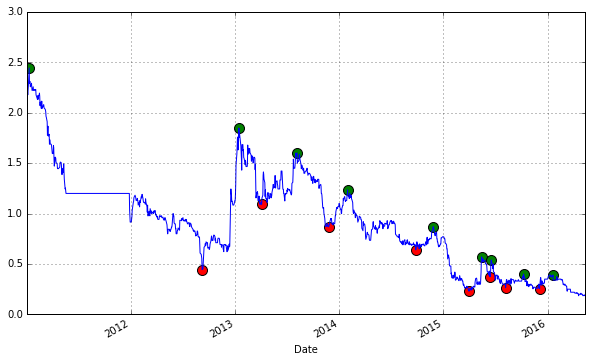

In [7]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
code_dat.loc[:, 'Close'].plot(kind='line')
plt.grid()
plt.scatter(local_min_ind, local_min, s=100, c='r')
plt.scatter(local_max_ind, local_max, s=100, c='g')

In [57]:
code_dat.loc[:, 'Close'].to_csv('close_price.csv')